<div style="font-family: Arial, sans-serif; text-align: center;">

# CodSoft Project 2


# Movie Rating Prediction


</div>





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error,r2_score,mean_absolute_error 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import  RandomForestRegressor
import category_encoders as ce



<div style="font-family: Arial, sans-serif; text-align: center;">

## Data Exploration

</div>

In [124]:
file_path = 'C:\\data science\\CodeSoft Internship\\movies rating\\IMDb Movies India.csv'

df= pd.read_csv('C:\\data science\\CodeSoft Internship\\movies rating\\IMDb Movies India.csv', encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [125]:
df.shape

(15509, 10)

In [126]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [127]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [128]:
missing_value_count= df.isnull().sum()
missing_value_count

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

Text(0.5, 1.0, 'Missing Value Percentage')

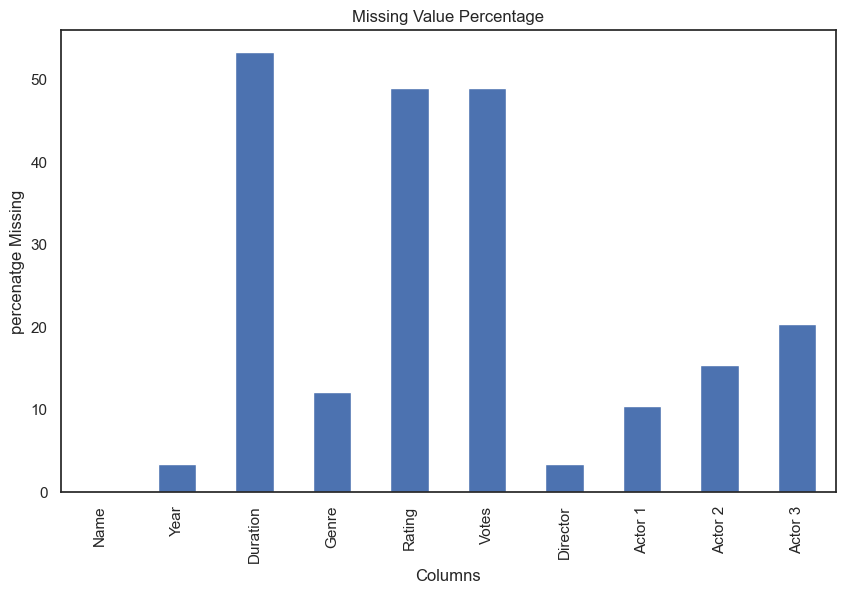

In [129]:
missing_percentage = df.isnull().mean() * 100
missing_percentage.plot(kind='bar', figsize=(10,6))
plt.xlabel('Columns')
plt.ylabel("percenatge Missing")
plt.title("Missing Value Percentage")


In [130]:
missing_data= pd.concat([missing_value_count, missing_percentage], axis=1, keys=['missing_value_count',' missing_percentage'])
missing_data

,missing_value_count,missing_percentage
Name,0,0.000000
Year,528,3.404475
Duration,8269,53.317429
Genre,1877,12.102650
Rating,7590,48.939326
Votes,7589,48.932878
Director,525,3.385131
Actor 1,1617,10.426204
Actor 2,2384,15.371720
Actor 3,3144,20.272100




<div style="font-family: Arial, sans-serif; text-align: center;">

## Refinement

</div>

In [131]:
df.dropna(subset=['Rating'], inplace=True)
(round(df.isnull().mean() * 100,2)).sort_values(ascending=False)

Duration    26.11
Actor 3      3.69
Actor 2      2.53
Actor 1      1.58
Genre        1.29
Director     0.06
Name         0.00
Year         0.00
Rating       0.00
Votes        0.00
dtype: float64

In [132]:
df.dropna(subset=['Director','Actor 1','Actor 2', 'Actor 3','Genre'], inplace=True)
(round(df.isnull().mean() * 100,2)).sort_values(ascending=False)

Duration    25.13
Name         0.00
Year         0.00
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.00
Actor 1      0.00
Actor 2      0.00
Actor 3      0.00
dtype: float64

In [133]:
df['Duration']= pd.to_numeric(df['Duration'].str.strip('min'))
df['Duration'].fillna(df['Duration'].mean(), inplace=True)


In [134]:
(round(df.isnull().mean() * 100,2)).sort_values(ascending=False)

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

In [135]:
df.drop_duplicates(inplace=True)
df.shape

(7558, 10)

In [136]:
# extracting the year using regular expression
df['Year'] = df['Year'].str.extract(r'(\d{4})')
# Convert the 'Year' column to numeric
non_numeric_values = df['Year'][pd.to_numeric(df['Year'], errors='coerce').isna()]
df['Year'].unique()



array(['2019', '1997', '2005', '2012', '2014', '2004', '2016', '1991',
       '2018', '2010', '1958', '2021', '2017', '2009', '1993', '2002',
       '1946', '2008', '1994', '2007', '2013', '2003', '1998', '1979',
       '1974', '2015', '2006', '1981', '2020', '1985', '2011', '1988',
       '1995', '1987', '1999', '1973', '1968', '1953', '1986', '1982',
       '1977', '1950', '1969', '1948', '1967', '1970', '1990', '1989',
       '1947', '2001', '2000', '1971', '1978', '1944', '1963', '1992',
       '1976', '1984', '1975', '1980', '1966', '1972', '1956', '1960',
       '1964', '1952', '1959', '1951', '1954', '1962', '1961', '1957',
       '1965', '1996', '1933', '1955', '1983', '1936', '1949', '1940',
       '1945', '1938', '1941', '1942', '1932', '1935', '1937', '1931',
       '1943', '1917', '1939', '1934'], dtype=object)

In [137]:
df['Votes']= df['Votes'].str.replace(',', '')

In [138]:
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
#df['Year']= df['Votes'].astype(int)
#df['Votes']= df['Votes'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   object 
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 649.5+ KB


In [139]:
movies_3_hours_long=(df['Duration']>180).sum()
movies_2_hours_long= ((df['Duration']>120) & (df['Duration']<180)).sum()
movies_1_hours_long= (df['Duration']<60).sum()      
print("movies Three hours long are:  ", movies_3_hours_long)
print("movies Two hours long are:  ", movies_2_hours_long)
print("movies One hours long are:  ", movies_1_hours_long)


movies Three hours long are:   113
movies Two hours long are:   5779
movies One hours long are:   27


In [140]:
df[['Rating','Votes','Duration']].describe()

,Rating,Votes,Duration
count,7558.000000,7558.000000,7558.000000
mean,5.811127,2029.123842,133.439124
std,1.368255,11868.695754,21.908841
min,1.100000,5.000000,21.000000
25%,4.900000,18.000000,125.000000
50%,6.000000,61.000000,133.439124
75%,6.800000,456.000000,144.000000
max,10.000000,591417.000000,321.000000


In [141]:
Top_5 = df[['Year','Rating']].sort_values(by='Rating' ,ascending=False)
Top_5.head()

,Year,Rating
8339,2020,10.0
5410,2021,9.7
2563,2020,9.6
14222,2020,9.4
5077,2019,9.4


In [142]:
df['Year'].unique()

array(['2019', '1997', '2005', '2012', '2014', '2004', '2016', '1991',
       '2018', '2010', '1958', '2021', '2017', '2009', '1993', '2002',
       '1946', '2008', '1994', '2007', '2013', '2003', '1998', '1979',
       '1974', '2015', '2006', '1981', '2020', '1985', '2011', '1988',
       '1995', '1987', '1999', '1973', '1968', '1953', '1986', '1982',
       '1977', '1950', '1969', '1948', '1967', '1970', '1990', '1989',
       '1947', '2001', '2000', '1971', '1978', '1944', '1963', '1992',
       '1976', '1984', '1975', '1980', '1966', '1972', '1956', '1960',
       '1964', '1952', '1959', '1951', '1954', '1962', '1961', '1957',
       '1965', '1996', '1933', '1955', '1983', '1936', '1949', '1940',
       '1945', '1938', '1941', '1942', '1932', '1935', '1937', '1931',
       '1943', '1917', '1939', '1934'], dtype=object)

In [143]:
df.drop(['Name'], axis=1,inplace=True)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7558 non-null   object 
 1   Duration  7558 non-null   float64
 2   Genre     7558 non-null   object 
 3   Rating    7558 non-null   float64
 4   Votes     7558 non-null   int64  
 5   Director  7558 non-null   object 
 6   Actor 1   7558 non-null   object 
 7   Actor 2   7558 non-null   object 
 8   Actor 3   7558 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 590.5+ KB


In [145]:
import copy
df_copy = copy.deepcopy(df)

In [146]:
categorical_columns= ['Actor 1','Actor 2', 'Actor 3','Genre','Director']
target_encoder = ce.TargetEncoder(cols=categorical_columns)
df_encoded= target_encoder.fit_transform(df_copy[categorical_columns],df['Rating'])
df_encoded.head(5)


,Actor 1,Actor 2,Actor 3,Genre,Director
1,5.958492,5.965810,5.965810,6.345910,5.965810
3,5.739776,5.627528,5.618050,5.700006,5.627528
5,5.350950,5.801892,5.797343,6.202931,5.618646
6,5.505122,5.851254,5.970584,5.995171,6.172825
8,5.783658,5.825411,5.783658,5.710685,5.783658


In [147]:
df_copy.drop(['Actor 1','Actor 2', 'Actor 3','Genre','Director'],axis=1, inplace=True)

In [148]:
updated_df = pd.concat([df_copy,df_encoded,],axis=1)
updated_df.head()

,Year,Duration,Rating,Votes,Actor 1,Actor 2,Actor 3,Genre,Director
1,2019,109.0,7.0,8,5.958492,5.965810,5.965810,6.345910,5.965810
3,2019,110.0,4.4,35,5.739776,5.627528,5.618050,5.700006,5.627528
5,1997,147.0,4.7,827,5.350950,5.801892,5.797343,6.202931,5.618646
6,2005,142.0,7.4,1086,5.505122,5.851254,5.970584,5.995171,6.172825
8,2012,82.0,5.6,326,5.783658,5.825411,5.783658,5.710685,5.783658


In [149]:
X= updated_df.drop(['Rating'],axis=1)
X.head()

,Year,Duration,Votes,Actor 1,Actor 2,Actor 3,Genre,Director
1,2019,109.0,8,5.958492,5.965810,5.965810,6.345910,5.965810
3,2019,110.0,35,5.739776,5.627528,5.618050,5.700006,5.627528
5,1997,147.0,827,5.350950,5.801892,5.797343,6.202931,5.618646
6,2005,142.0,1086,5.505122,5.851254,5.970584,5.995171,6.172825
8,2012,82.0,326,5.783658,5.825411,5.783658,5.710685,5.783658


In [150]:
Y= df['Rating']
Y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [152]:
print('Shape of training features: ', X_train.shape)
print('Shape of training target: ', Y_train.shape)
print('Shape of testing features: ', X_test.shape)
print('Shape of testing target: ', Y_test.shape)

Shape of training features:  (6046, 8)
Shape of training target:  (6046,)
Shape of testing features:  (1512, 8)
Shape of testing target:  (1512,)



<div style="font-family: Arial, sans-serif; text-align: center;">

## Models Implementation

</div>


<div style="font-family: Arial, sans-serif; text-align: center;">

### Linear Regression

</div>

In [153]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr_pred= lr.predict(X_test)

In [154]:
print("The Mean Squared error is : ", mean_squared_error(Y_test,lr_pred))
print("The Mean Absolute error is: ",mean_absolute_error(Y_test,lr_pred))
print("The R2 score is : ",r2_score(Y_test,lr_pred))
print("The K fold cross validation is: ",cross_val_score(lr,X,Y, cv=5, scoring='neg_mean_squared_error'))

The Mean Squared error is :  0.7537445976594518
The Mean Absolute error is:  0.6751613685165656
The R2 score is :  0.593194415168061
The K fold cross validation is:  [-0.68480993 -0.73369504 -0.75391275 -0.80167564 -0.76067741]



<div style="font-family: Arial, sans-serif; text-align: center;">

### Random forest

</div>

In [155]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
rf_pred= rf.predict(X_test)

In [121]:
print("The Mean Squared error is : ", mean_squared_error(Y_test,rf_pred))
print("The Mean Absolute error is: ",mean_absolute_error(Y_test,rf_pred))
print("The R2 score is : ",r2_score(Y_test,rf_pred))
print("The K fold cross validation is: ",cross_val_score(lr,X,Y, cv=5, scoring='neg_mean_squared_error'))

The Mean Squared error is :  0.4705511957671958
The Mean Absolute error is:  0.47412698412698406
The R2 score is :  0.7460375106078986
The K fold cross validation is:  [-0.68480993 -0.73369504 -0.75391275 -0.80167564 -0.76067741]



<div style="font-family: Arial, sans-serif; text-align: center;">

### Residual Analysis

</div>

In [156]:
results = pd.DataFrame({'actual': Y_test,
                        'predicted': lr_pred.ravel(),
                        'residual': Y_test - lr_pred}
                      )
results.head()

,actual,predicted,residual
6241,7.4,7.449866,-0.049866
3321,4.9,5.921325,-1.021325
6117,6.5,6.402810,0.097190
5975,5.7,5.753287,-0.053287
6653,7.0,6.606100,0.393900


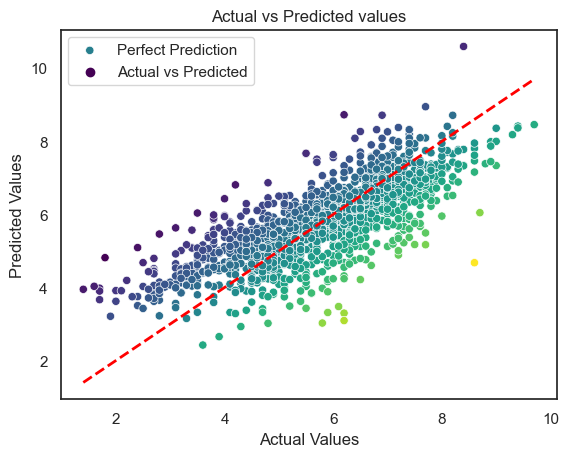

In [157]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['actual'], y=results['predicted'], hue=results['residual'], palette='viridis')
plt.title('Actual vs Predicted values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a diagonal line for reference (perfect prediction)
plt.plot([results['actual'].min(), results['actual'].max()],
         [results['actual'].min(), results['actual'].max()],
         linestyle='--', color='red', linewidth=2)

# Add a legend
plt.legend(['Perfect Prediction', 'Actual vs Predicted'])

plt.show()


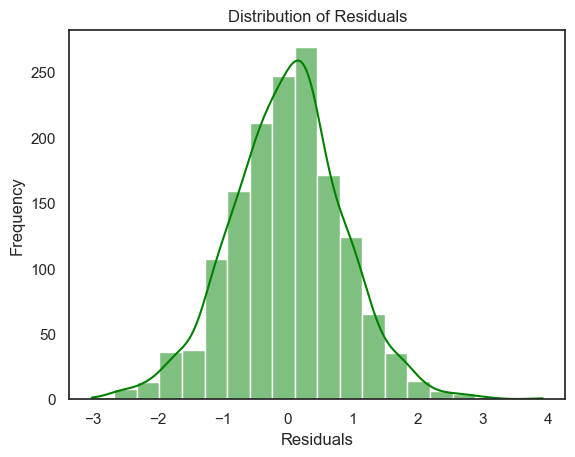

In [158]:
# Histogram of residuals
sns.histplot(results['residual'], bins=20, kde=True,color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


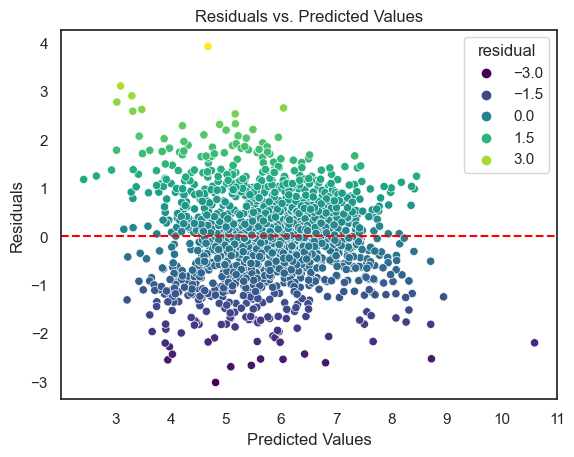

In [159]:
# Scatter plot of residuals vs. predicted values
sns.scatterplot(x=lr_pred, y=results['residual'], hue=results['residual'], palette='viridis')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
